# Correlación de Pearson
 es una medida estadística que indica qué tan fuerte y en qué dirección se relacionan dos variables cuantitativas.
 

In [1]:
import numpy as np
from scipy.stats import pearsonr

x = np.random.randn(1000)
y = np.random.randn(1000)

# Correlación de Pearson
r, p_value = pearsonr(x, y)

print("Coeficiente de correlación:", r)
print("p-value:", p_value)


Coeficiente de correlación: 0.09785383847065121
p-value: 0.00194846321837629


# Coherencia espectral

Es una medida de sincronización en frecuencia entre dos señales.
Valores:

1 → sincronía perfecta en esa frecuencia

0 → no están sincronizadas

En programación, la coherencia se calcula comparando los espectros de potencia y la densidad espectral cruzada de dos señales.

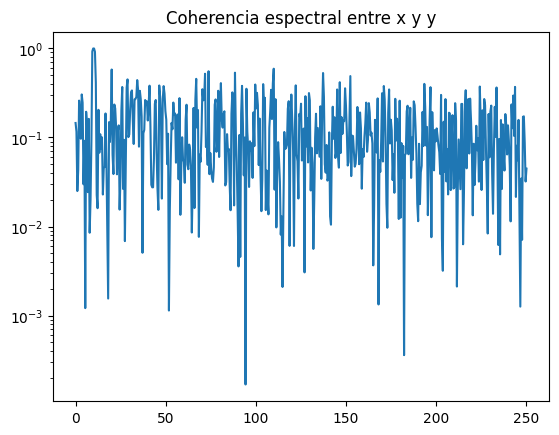

In [2]:
from scipy.signal import coherence
import numpy as np
import matplotlib.pyplot as plt
fs = 500  
t = np.arange(0, 10, 1/fs)

x = np.sin(2*np.pi*10*t) + np.random.randn(len(t))*0.5
y = np.sin(2*np.pi*10*t + np.pi/4) + np.random.randn(len(t))*0.5

# Coherencia espectral
f, Cxy = coherence(x, y, fs=fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.title('Coherencia espectral entre x y y')
plt.show()

# PLV 
El PLV mide qué tan sincronizadas están las fases de dos señales.
Va de 0 a 1.

In [3]:

from scipy.signal import hilbert, butter, filtfilt
import numpy as np

fs = 500
t = np.arange(0, 5, 1/fs)
x = np.sin(2*np.pi*10*t)
y = np.sin(2*np.pi*10*t + np.pi/6)

# 1. Filtro banda
def bandpass_filter(sig, fs, low, high):
    b, a = butter(3, [low/(fs/2), high/(fs/2)], btype='band')
    return filtfilt(b, a, sig)

x_filt = bandpass_filter(x, fs, 8, 12)
y_filt = bandpass_filter(y, fs, 8, 12)

# 2. Fase instantánea mediante transformada de Hilbert
phase_x = np.angle(hilbert(x_filt))
phase_y = np.angle(hilbert(y_filt))

# 3. PLV = promedio de la diferencia de fase
plv = np.abs(np.mean(np.exp(1j*(phase_x - phase_y))))

In [4]:
print("PLV:", plv)

PLV: 0.9984029677253742
